# WS2

In [45]:
import  pandas as pd
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
import numpy as np
from numpy import array, reshape, zeros, append, arange
import math
from math import log, e, pi
import numpy
from sys import argv

[2500 2600 2700 2800 2900 3000 3100 3200]
[4.10056785e-05 8.20522888e-05 1.55963448e-04 2.83159561e-04
 4.93374825e-04 8.28411953e-04 1.34522560e-03 2.11926171e-03]


<function matplotlib.pyplot.show(close=None, block=None)>

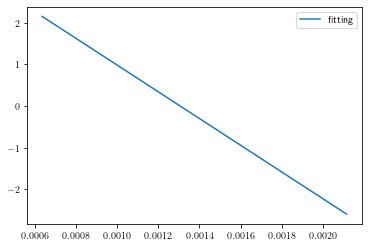

In [46]:

xr=np.array(np.arange(473,1600,100))

xw=np.array(np.arange(2500,3300,100))
print(xw)
#xw=np.array(np.arange(2800,3700,100))
xr=1/xr
xw=1/xw
yr=(4.1879-(3209*xr))
yw=(7.933-(45087*xw))
plt.plot(xr,yr, label='fitting')
pS=np.exp(yr)

pW=np.exp(yw)
print(pW)
plt.legend()
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

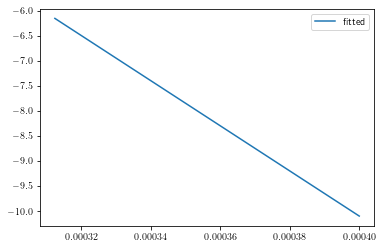

In [47]:

plt.plot(xw,yw, label='fitted')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

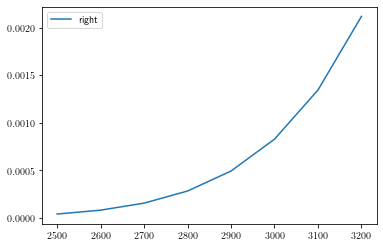

In [48]:


#print(pW)
plt.plot(1/xw,pW, label='right')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

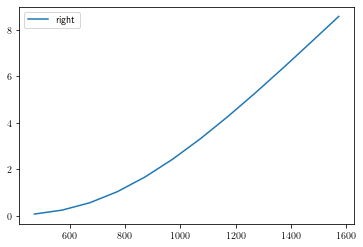

In [49]:

plt.plot(1/xr,pS, label='right')
plt.legend()
plt.show

 #### Total Energies in eV

In [50]:
E0=-11861477.311070437 # pristine
E1=-11872355.158936081# addon S
E2=-11850595.236526014 # mono S vacancy
E3=-11839713.678986968 # di S vacancy up&down
E4=-11839713.145423930 # di S vacancy neighboring
E5=-11408771.970668823 # mono W vacancy
E_WS2=-474458.138971034 # primtitive
ES8=-87031.629750345    #8 atoms in unitcell of S8 ring
EW=-905397.333160509 # W BCC 

#### Constants

In [51]:
pi=numpy.pi
convert=29979245800.0*2*pi # cm^-1 to Hz

#### Frequencies 

In [52]:
d0=pd.read_csv('w0', sep='\s+',header=0)
d1=pd.read_csv('addS', sep='\s+',header=0)
d2=pd.read_csv('VS', sep='\s+',header=0)
d3=pd.read_csv('VS2', sep='\s+',header=0)
d4=pd.read_csv('VS22', sep='\s+',header=0)
d5=pd.read_csv('VW', sep='\s+',header=0)
dS=pd.read_csv('w', sep='\s+',header=0)
dW=pd.read_csv('W_BCC', sep='\s+',header=0)

wW=dW['x']*convert 
wS8=dS['x']*convert 
w0=d0['w0']*convert
w1=d1['addS']*convert
w2=d2['VS']*convert
w3=d3['VS2']*convert
w4=d4['VS22']*convert
w5=d5['VW']*convert 

In [53]:
T=1000# 1.89e-3 atm (atm to cgs * 1013250))
p0=1013250  # atm to g/(cm s^2) 
p01=1
kk=1.380649e-16 # erg/k (cm^2.g/ks^2)
k=8.617333262145e-05 # ev/k
h=6.62607015e-27  # erg.s 
hb=6.582119569e-16 # eV.s
hbar=1.054571817e-27 # erg.s
sigma=8
m=4.258952992e-22 # 32.06*8 in amu changed to g
IA=1.314051643394595e-37 # g.cm^2
IB=1.314146807283309e-37
IC=2.42660958899724e-37

In [54]:
D=[]
E=[]

I=np.sqrt(IA)*np.sqrt(IB)*np.sqrt(IC)
A=np.log((((2*pi*m)**(3/2))*((kk*T)**(5/2)))/(p0*(h**3)))
B=np.log(np.sqrt(pi)/sigma)+ np.log((((8*pi*kk*T)/(h**2))**(3/2))*I)
temp=numpy.array([(np.log(1-math.exp(-(hbar*i)/(kk*T)))) for i in wS8])
C=np.sum(temp)
mu_0=-k*T*(A+B-C)
for i in pS:
       
        E.append(k*T*np.log(i/p01))
 
        
#
#print('E',E)
#print('mu_0', mu_0)
temp2=numpy.array([(hb*i)/(2) for i in wS8])
D=np.sum(temp2)
#print('D',D)
mu_S8=mu_0 + np.array(E) + D + ES8 
#print('mu_S8',mu_S8)

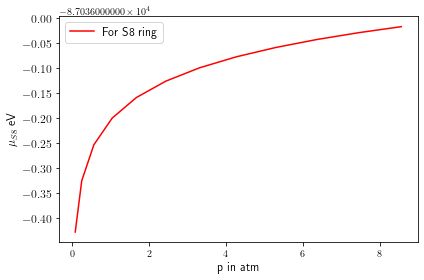

In [55]:
#p=arange(1.89e-3,1.89e+3,1)

plt.plot(pS,mu_S8, 'red', label='For S8 ring')
plt.xlabel('p in atm', fontsize=12)
plt.ylabel(r'$\mu_{S8}$ eV', fontsize=12)
plt.legend(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

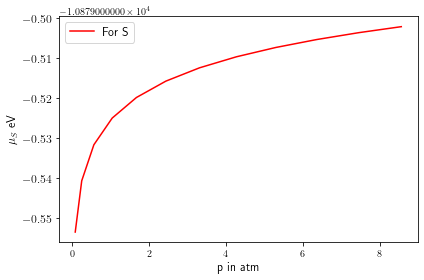

In [56]:
mu_S=array(mu_S8)/8
#p=arange(1.89e-3,1.89e+3,1)
plt.plot(pS,mu_S, 'red', label='For S')
plt.xlabel('p in atm', fontsize=12)
plt.ylabel(r'$\mu_S$ eV', fontsize=12)
plt.legend(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('muS_T.png',dpi=400)

In [57]:
def free_energy(omega):
   F=[]
  
   omega = numpy.array(omega)
   #for p in arange(1.89e-3,1.89e+3,e-1):
      
   temp3=numpy.array([(hb*i/2 + k*T*np.log(1-math.exp(-(hb*i)/(k*T)))) for i in omega])
   F.append(numpy.sum(temp3))


   return F

In [58]:
def DeltaF(X,Y):
   deltaF=[]
   F1=free_energy(X)
   F2=free_energy(Y)
   zip_object = zip(F1, F2)
   for i, j in zip_object:    
       deltaF.append(i-j)
   return deltaF 

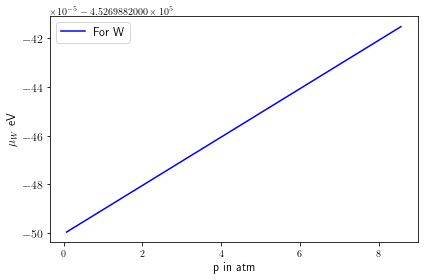

In [59]:
Fphon=free_energy(wW)
Fphon=np.array(Fphon)
#print(Fphon)
#print(EW)

V= 0.3133E+02 # volume of unitcell A^3
#print(pW*V*6.3242093e-07)
mu_W=[]
for i in pS:
       
        mu_W.append((1/2)*(EW+np.array((i*V*6.3242093e-07))+ Fphon))
 
#pp= 7.329633135876344e-05 # at 2000 k
#PV=pW*V*6.3242093e-07 # to eV
#mu_W=(1/2)*(EW+PV+ Fphon)

plt.plot(pS,mu_W, 'blue', label='For W')
#print(mu_W)
plt.xlabel('p in atm', fontsize=12)
plt.ylabel(r'$\mu_{W}$ eV', fontsize=12)
plt.legend(fontsize=12)
#plt.ylimit(-452698.820,)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('muW_T.png',dpi=400)

In [60]:
addS = numpy.array([E1-E0-a + DeltaF(w1,w0) for a in (mu_S)])
VS =  numpy.array([E2-E0+a + DeltaF(w2,w0) for a in mu_S])
VS2 =  numpy.array([E3-E0+2*a + DeltaF(w3,w0) for a in mu_S])
VS22 =  numpy.array([E4-E0+2*a + DeltaF(w4,w0) for a in  mu_S])
VW =  numpy.array([E5-E0+a + DeltaF(w5,w0) for a in mu_W])


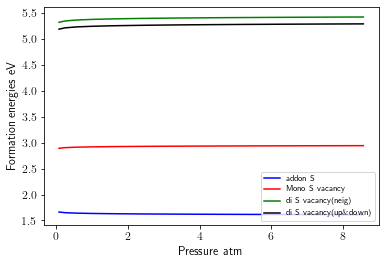

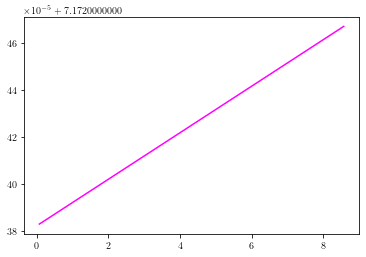

In [61]:
#p=arange(1.89e-3,1.89e+3,1)

plt.plot(pS, addS, 'b', label='addon S')
plt.plot(pS, VS, 'r', label='Mono S vacancy')
plt.plot(pS, VS22, 'g', label='di S vacancy(neig)') 
plt.plot(pS, VS2, 'k', label=r'di S vacancy(up$\&$down)')
#plt.plot(pS, VW, 'magenta', label='Mono W vacany') 
plt.xlabel('Pressure atm', fontsize=12)
plt.ylabel('Formation energies eV', fontsize=12)
plt.legend(loc='lower right',fontsize=8)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('Ef_p.png',dpi=400)
plt.show()
plt.plot(pS, VW, 'magenta', label='Mono W vacany') 
plt.show()
#print(addS)

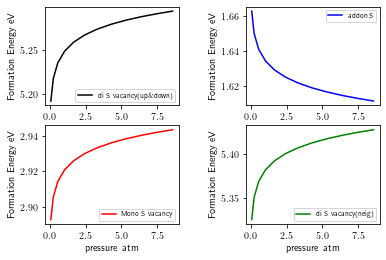

In [62]:
fig, axs = plt.subplots(2, 2)
#p=arange(1.89e-3,1.89e+3,1)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.2)
#axs[0, 0].plot(pS, VW, 'magenta', label='Mono W vacany')

axs[0, 1].plot(pS, addS, 'b', label='addon S')
axs[0, 1].legend(fontsize=7)
axs[1, 0].plot(pS, VS, 'r', label='Mono S vacancy')
axs[1, 0].legend(fontsize=7)
axs[1, 1].plot(pS, VS22, 'g', label='di S vacancy(neig)')
axs[0, 0].plot(pS, VS2, 'k', label=r'di S vacancy(up$\&$down)')
axs[1, 1].legend(fontsize=7)
axs[0, 0].legend(fontsize=7)
for ax in axs.flat:
    ax.set(xlabel='pressure atm', ylabel='Formation Energy eV')

plt.savefig('Ef_2_p.png',dpi=400)   